### SUPPORT VECTOR MACHINE
###### data set selection
For this assignment, we'll utilize the widely recognized Mushroom Dataset

1. Task 1: Exploratory Data Analysis (EDA):
* Load the Mushroom dataset and perform fundamental data exploration.
* 	Utilize histograms, box plots, or density plots to understand feature distributions
* .	Investigate feature correlations to discern relationships within the data.
 

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Akshata\OneDrive\Desktop\Assignment\SVM\mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.shape

(2000, 26)

In [4]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

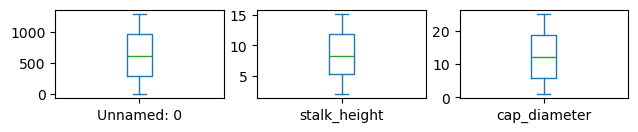

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df.plot(kind='box',figsize=(10,8),subplots=True,layout=(6,4),sharex=False,sharey=False)
plt.show()

##### Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [10]:
#encode categorical variables using labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])

In [11]:
#Split the dataset into features(x) and target(y)
x=df.drop('class',axis=1)
y=df['class']

In [12]:
print(x)
print(y)

      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0            889          4            2          7        0     1   
1            786          4            0          6        0     1   
2            246          3            1          5        1     4   
3            221          0            2          4        1     3   
4            630          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         656          4            2          0        1     4   
1996         885          4            2          5        1     5   
1997         205          2            1          3        1     3   
1998         329          0            3          7        0     7   
1999         814          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  \
0                   1             2          0           7  ...   
1                   3    

In [13]:
#Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600, 25), (400, 25), (1600,), (400,))

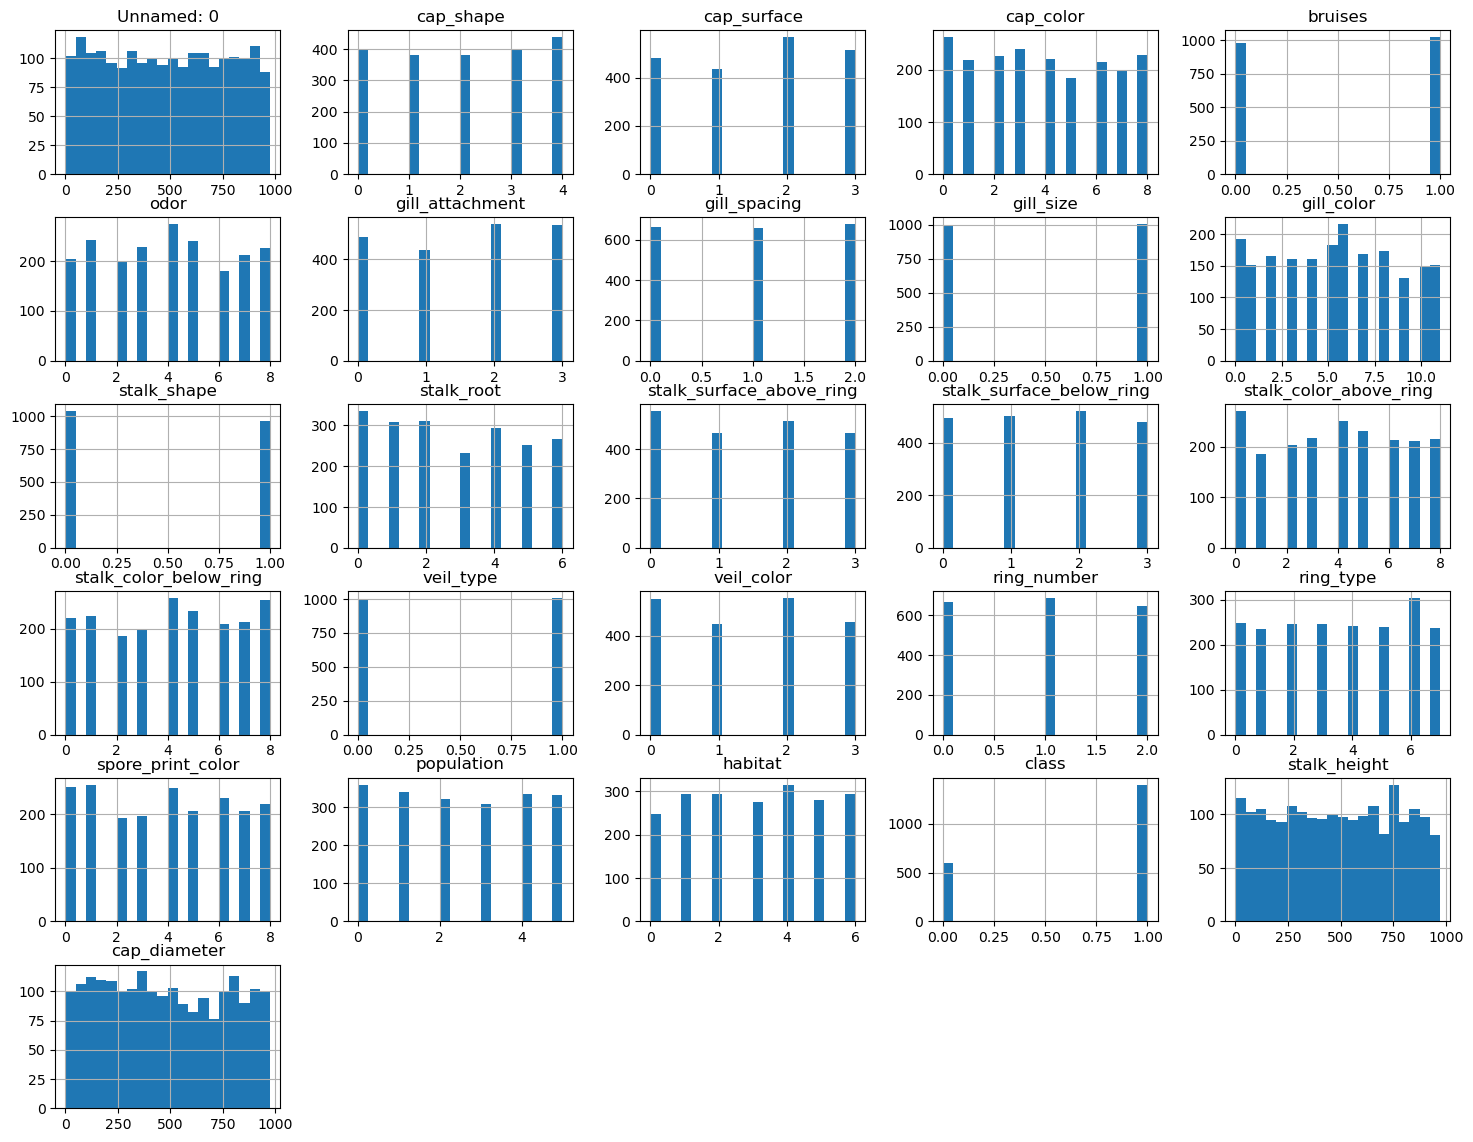

In [15]:
#visualization
#histogram
df.hist(figsize=(18,14),bins=20)
plt.show()

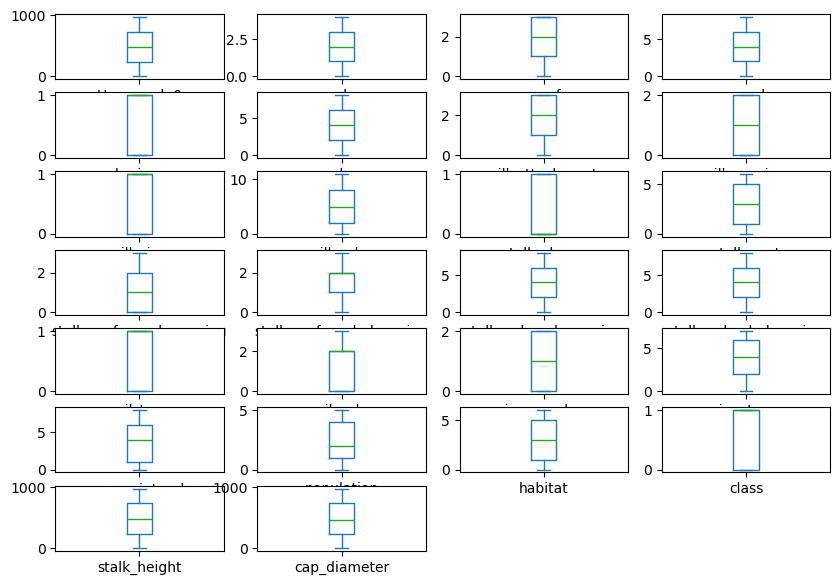

In [16]:
import seaborn as sns
df.plot(kind='box',figsize=(10,8),subplots=True,layout=(8,4),sharex=False,sharey=False)
plt.show()

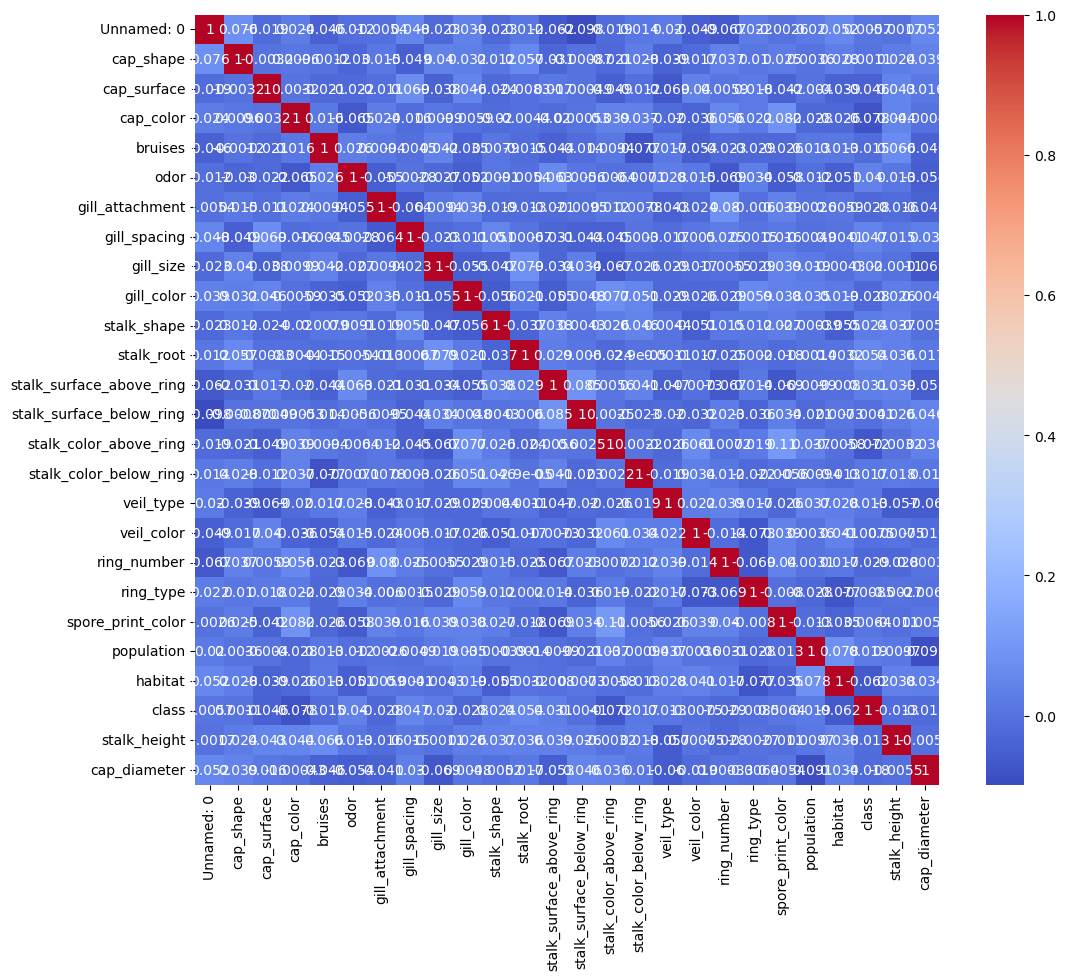

In [17]:
#correlation using heatmap
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Task 3: Data Visualization:
* 	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships
* .	Visualize class distributions to gauge dataset balance or imbalance.


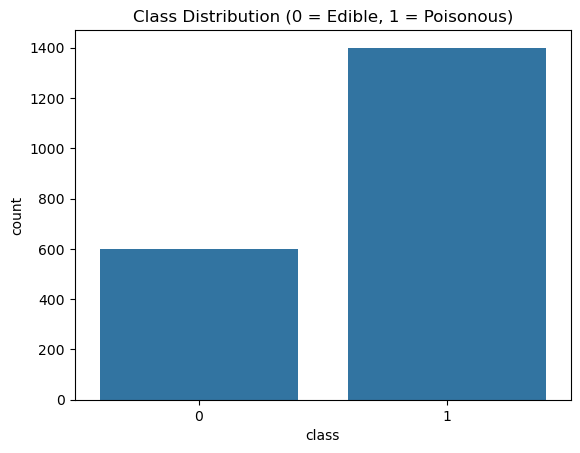

In [19]:
# Task 3: Data Visualization
# Visualize the distribution of the class labels
sns.countplot(x='class', data=df)
plt.title('Class Distribution (0 = Edible, 1 = Poisonous)')
plt.show()

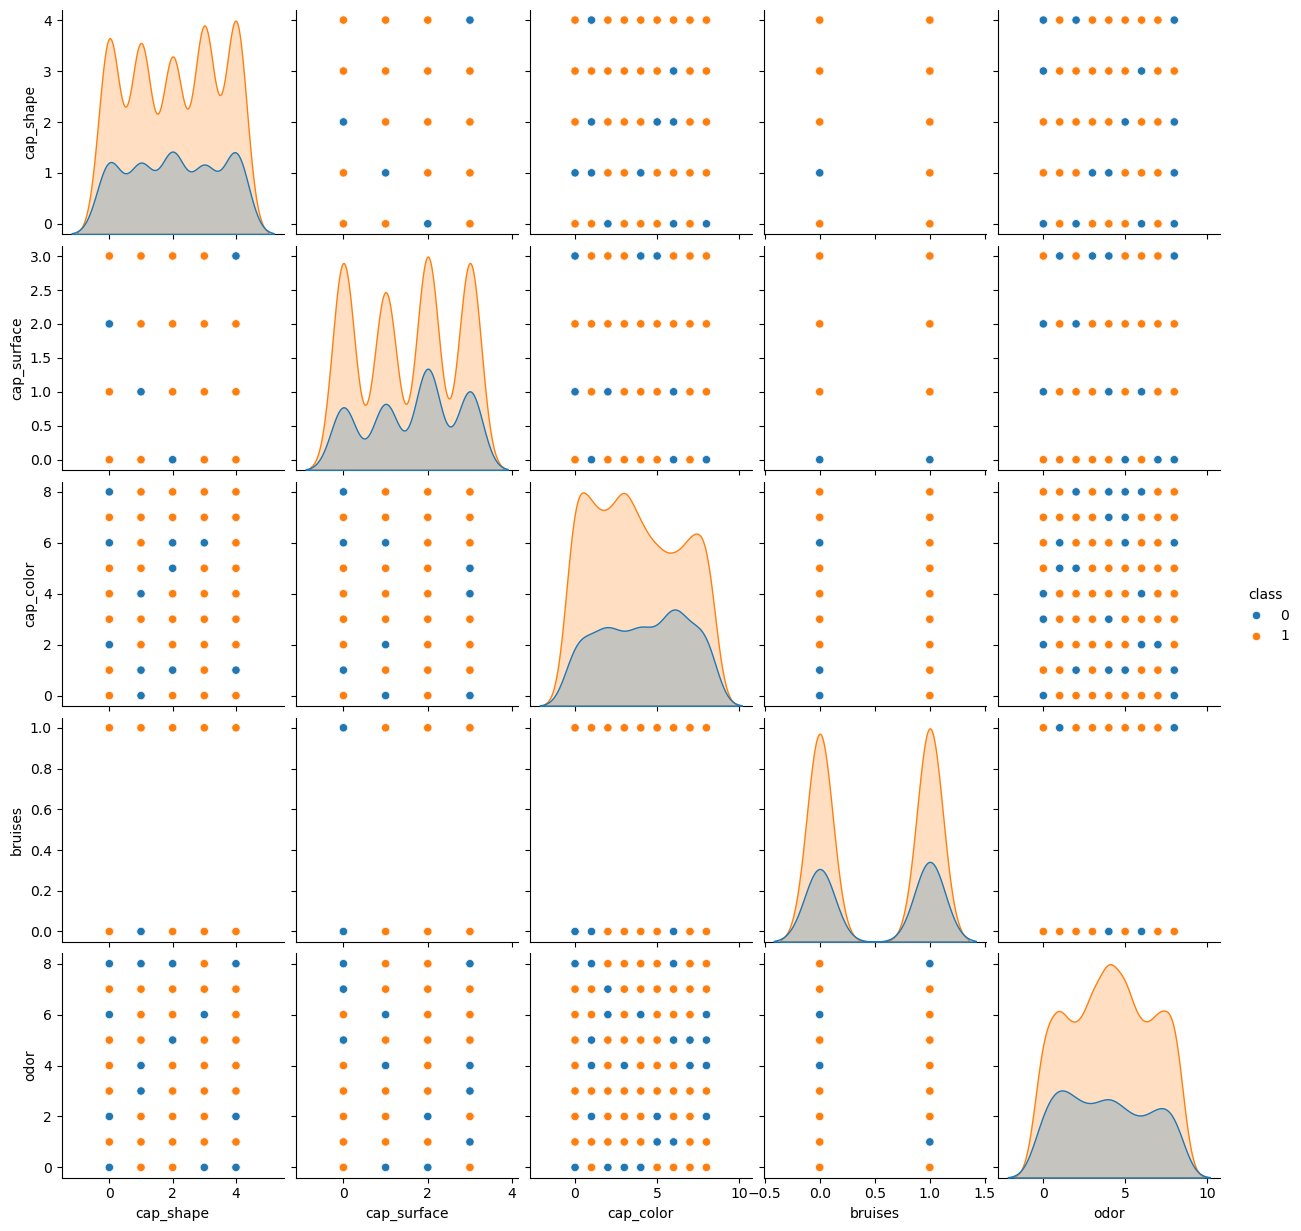

In [20]:
# Pairplot for relationships among features (use a subset for faster plotting)
sns.pairplot(df[['cap_shape','cap_surface','cap_color','bruises','odor','class']], hue='class')
plt.show()

##### Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#implement a basic svm classifier using linear kernal
svm_model=SVC(kernel='linear')
svm_model

SVC(kernel='linear')

In [23]:
# Train the model on the training data
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [24]:
# Make predictions on the test data
y_pred = svm_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
# Classification report and confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')
Accuracy=accuracy_score(y_test,y_pred)
precision, recall, f1, Accuracy

(0.44555625, 0.6675, 0.5344002998500749, 0.6675)

##### Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


In [27]:
#classification
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('classification report:\n',classification_report(y_test,y_pred))


confusion matrix:
 [[  0 133]
 [  0 267]]
classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\Akshata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Akshata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Akshata\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###### Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [65]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.706 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [63]:
grid_predictions = grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 


              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



In [66]:
#We have got almost 100 % prediction result.

##### Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).


In [72]:
# Trying different SVM kernels: linear, polynomial, and radial basis function (RBF)
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f"\nSVM with {kernel} kernel:")
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))


SVM with linear kernel:
Accuracy: 0.6675

SVM with poly kernel:
Accuracy: 0.6675

SVM with rbf kernel:
Accuracy: 0.6675


In [78]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
     

DecisionTreeClassifier()

In [80]:
DecisionTreeClassifier()

DecisionTreeClassifier()

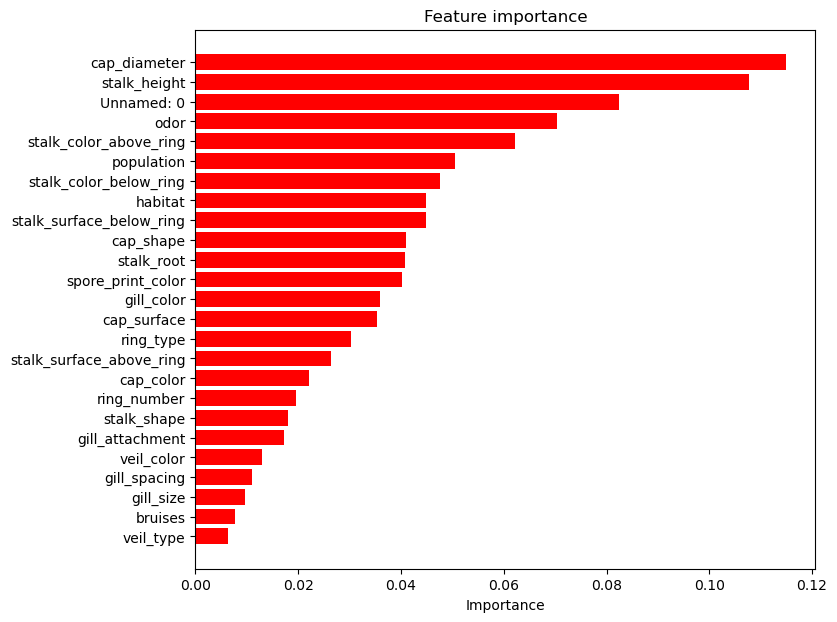

In [86]:

#Feature importance
import numpy as np
features_list = x.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [88]:
preds = dt.predict(x_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0]
[1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0]


Conclusion:

From the confusion matrix, we saw that our train and test data is balanced.

Most of the classification methods hit above 89% accuracy with this dataset.